# Importing the libraries 

In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 


import pandasql as psql

In [2]:
Data = pd.read_csv(r"C:\Users\Rakesh\Downloads\archive\heart_2020_cleaned.csv", header=0)
data_bk=Data.copy()
Data.head()



,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
Data.shape

(319795, 18)

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
Data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [6]:
#Checking Null Values

Data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
#Checking Duplicates
Data.duplicated().sum()


18078

In [8]:
#Dropping Duplicates
Data.drop_duplicates(inplace=True)

# Visualizing Data Distribution

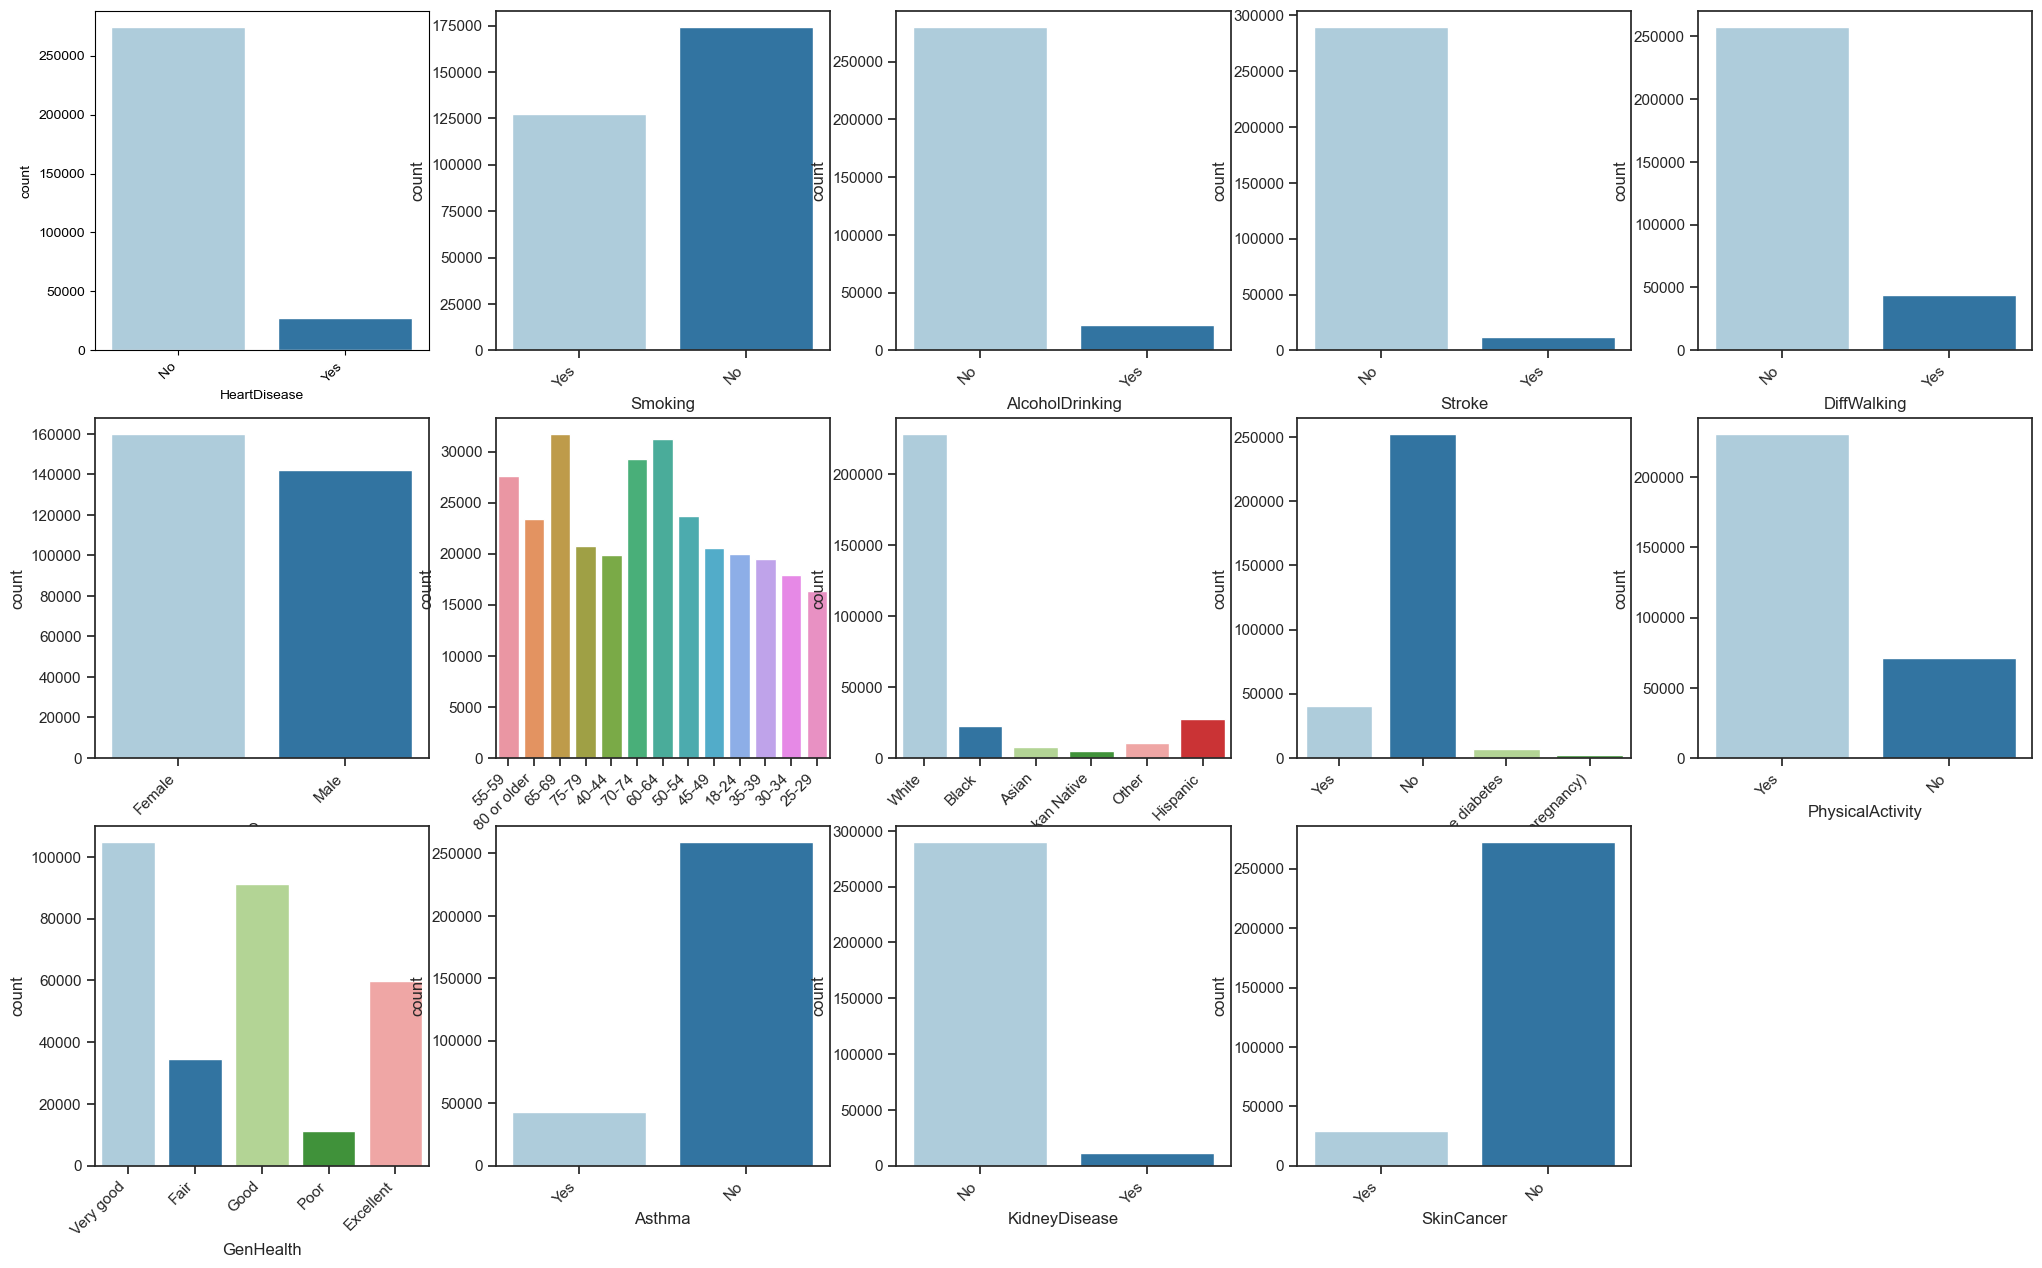

In [9]:
#Visualizing Data Distribution
categorical_features = Data.select_dtypes(include=[object])

plt.figure(figsize = (25,15))
for i, feature in enumerate(categorical_features):
      plt.subplot(3,5,i + 1)
      sns.set(palette='Paired')
      sns.set_style("ticks")
      ax = sns.countplot(x = feature, data = Data)#, hue = 'Stroke')#, color='#221C35')
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


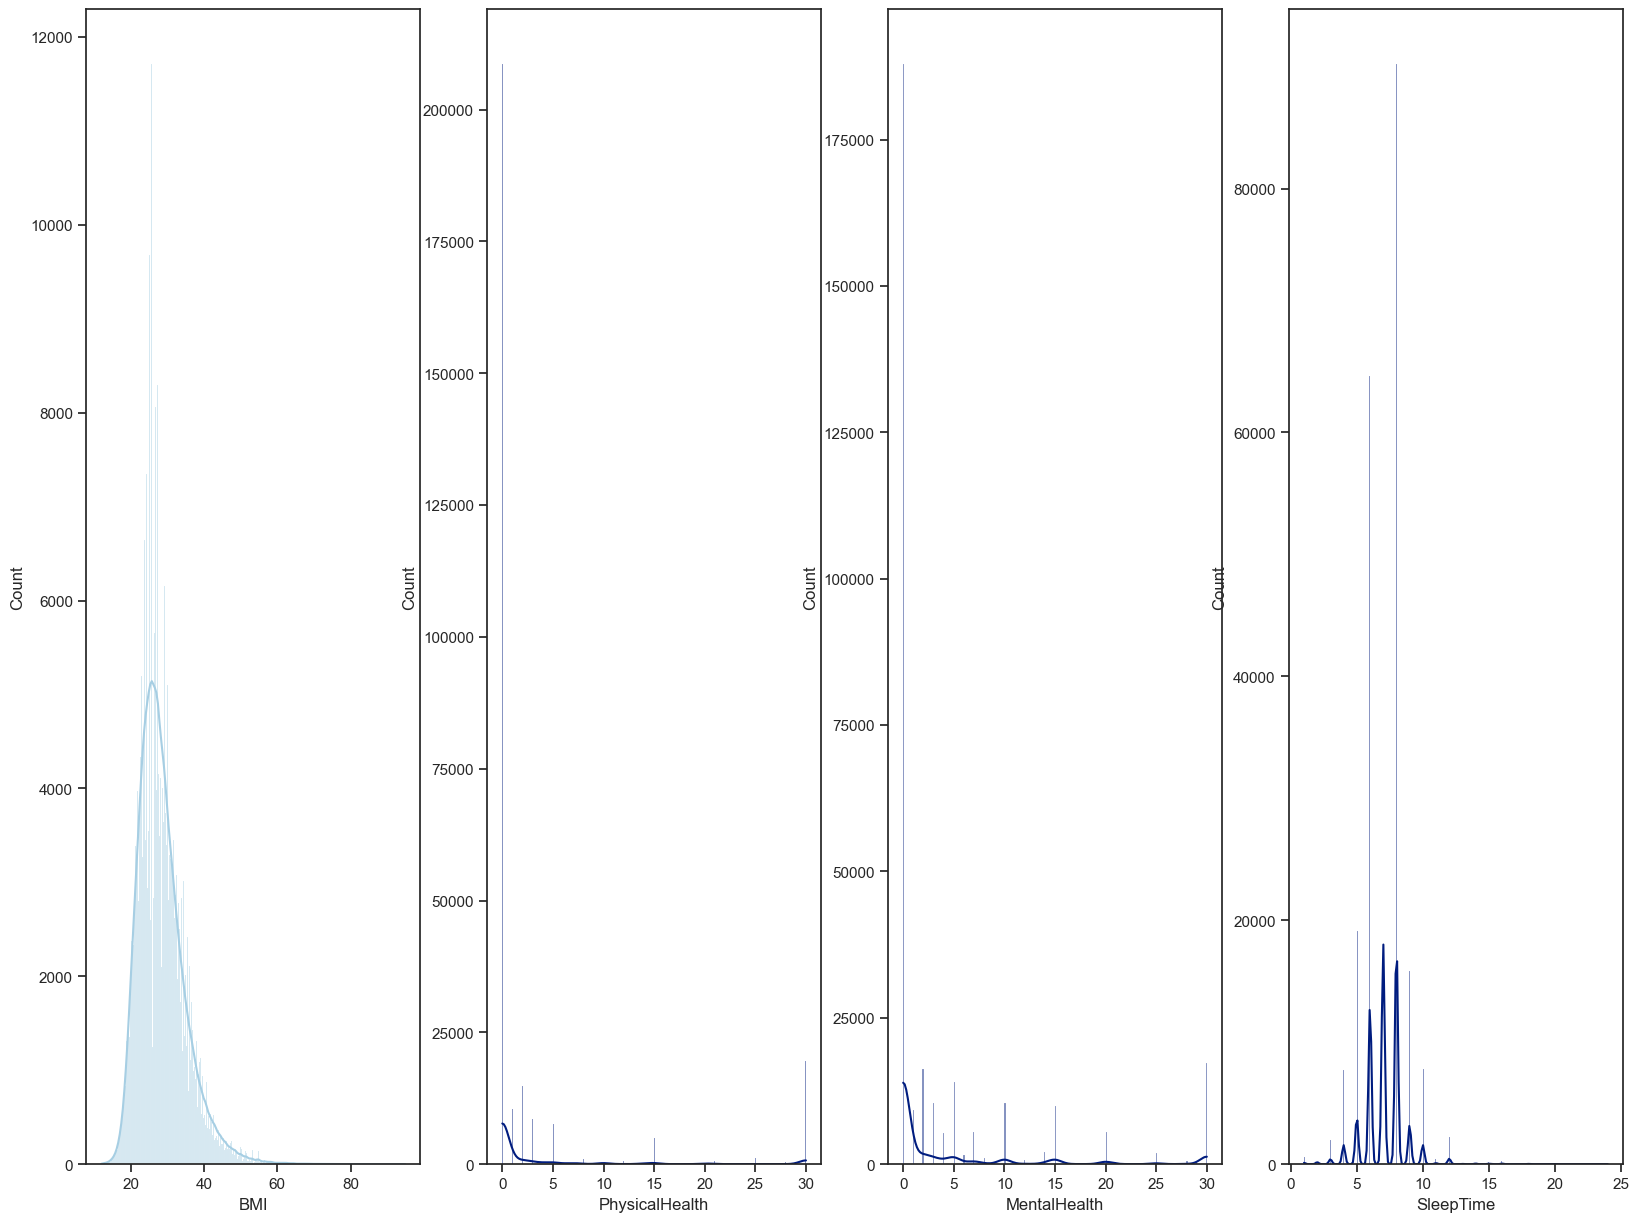

In [10]:
numeric_features = Data.select_dtypes(include=[np.number])

plt.figure(figsize = (25,15))
for i, feature in enumerate(numeric_features.columns):
    plt.subplot(1,5,i + 1)
    sns.set(palette='dark')
    sns.set_style("ticks")
    sns.histplot(Data[feature],kde=True)
    plt.xlabel(feature)
    plt.ylabel("Count")

### Scatterplot

<Axes: xlabel='BMI', ylabel='PhysicalHealth'>

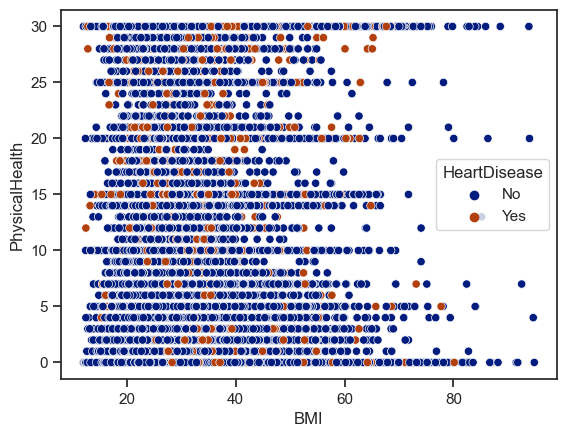

In [11]:
sns.scatterplot(data=Data, x=Data.BMI, y=Data.PhysicalHealth, hue=Data.HeartDisease)

### Show Heart Disease Frequency for Sex

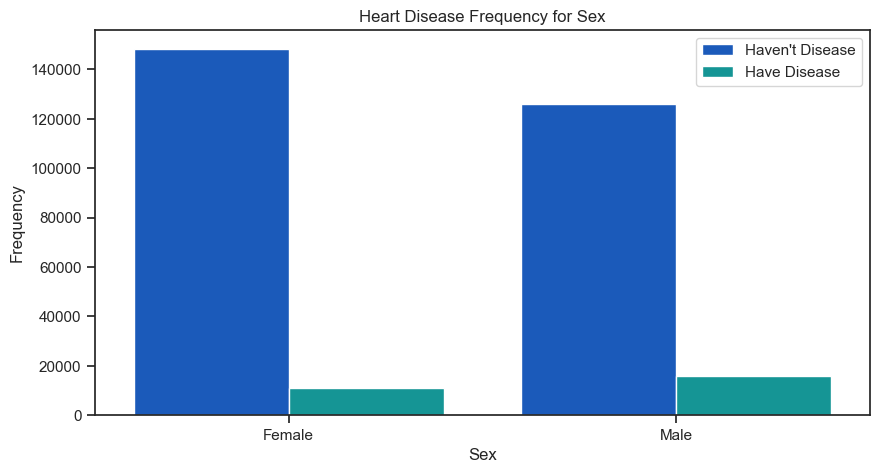

In [12]:
#show Heart Disease Frequency for Sex
plt.figure(figsize=(10,5))
sns.countplot(x = Data['Sex'], data=Data, hue='HeartDisease',palette="winter")
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

### Raito of Heart Disease

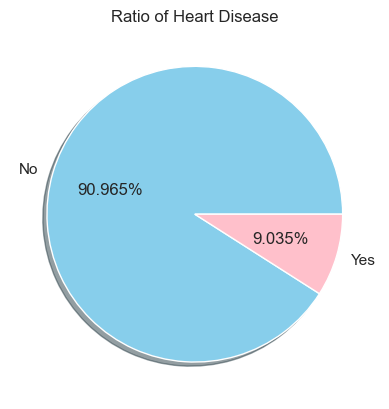

In [13]:
plt.pie(x = Data['HeartDisease'].value_counts() ,autopct='%1.3f%%' ,labels=['No', 'Yes'], colors=['skyblue', 'pink'], shadow=True)
plt.title('Ratio of Heart Disease')
plt.show()


## Correlation Heatmap

(4.5, -0.5)

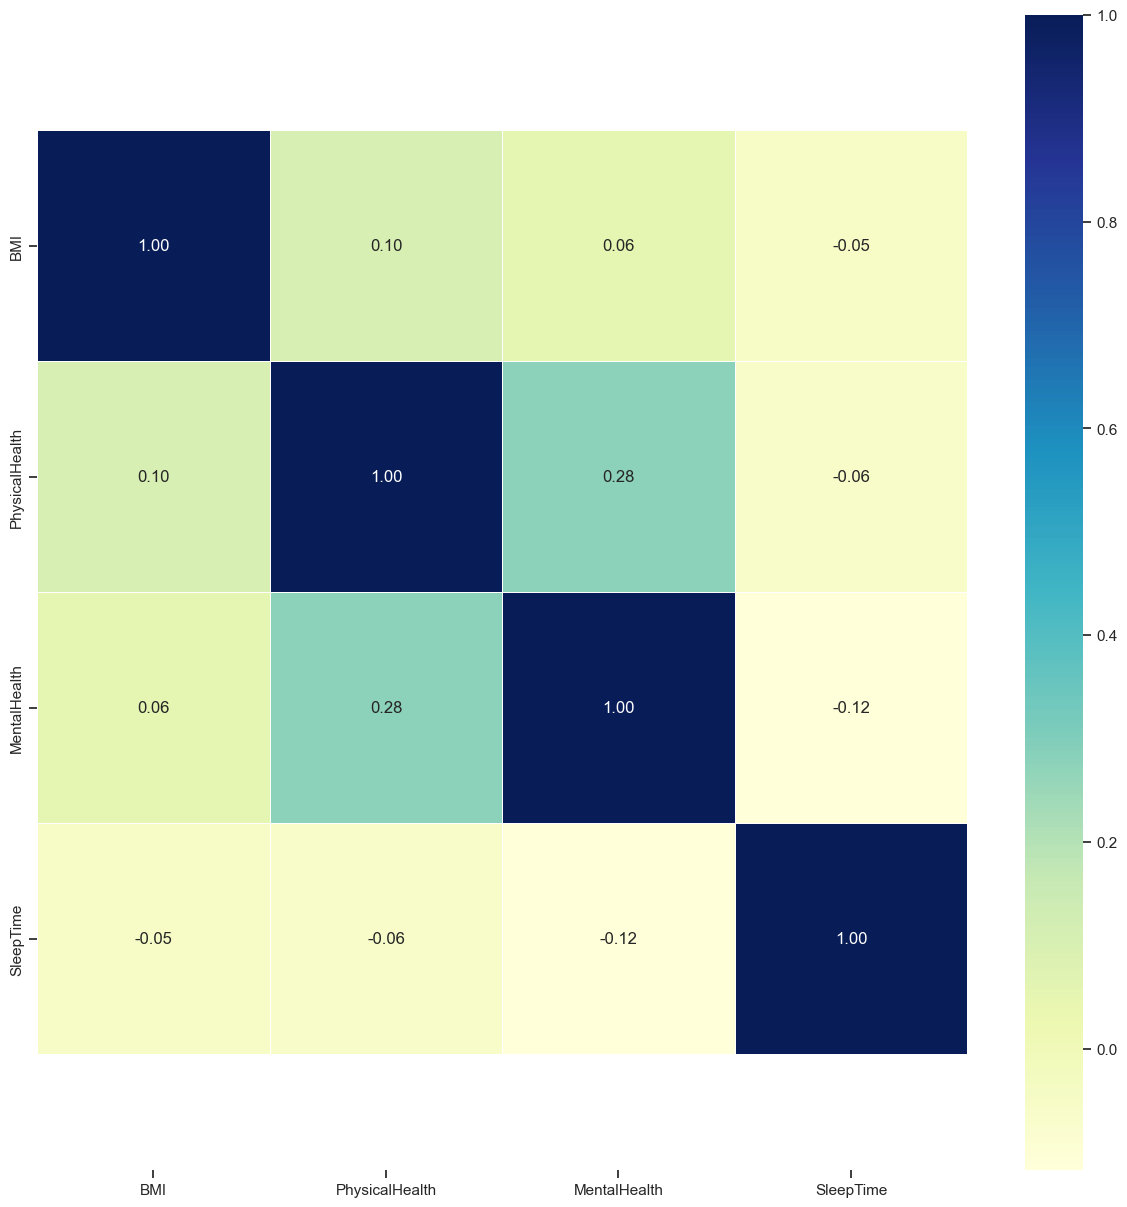

In [14]:
corr_matrix = Data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Label Encoding

In [15]:
Data.columns


Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() 
categorical_columns =['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer']

for column in categorical_columns:
    Data[column] = label_encoder.fit_transform(Data[column])

# Convert the DataFrame to int64
Data = Data.astype('int64')

# Display the converted DataFrame
print(Data)

        HeartDisease   BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0   223        1                0       0               3   
1                  0   524        0                0       1               0   
2                  0  1103        1                0       0              20   
3                  0   883        0                0       0               0   
4                  0   837        0                0       0              28   
...              ...   ...      ...              ...     ...             ...   
319790             1  1180        1                0       0               7   
319791             0  1397        1                0       0               0   
319792             0   886        0                0       0               0   
319793             0  1658        0                0       0               0   
319794             0  2700        0                0       0               0   

        MentalHealth  DiffWalking  Sex 

In [17]:
Data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,223,1,0,0,3,30,0,0,7,5,2,1,4,4,1,0,1
1,0,524,0,0,1,0,0,0,0,12,5,0,1,4,6,0,0,0
2,0,1103,1,0,0,20,30,0,1,9,5,2,1,1,7,1,0,0
3,0,883,0,0,0,0,0,0,0,11,5,0,0,2,5,0,0,1
4,0,837,0,0,0,28,0,1,0,4,5,0,1,4,7,0,0,0


In [18]:
#Count the target or dependent variable by '0' and '1' and their proportion
#(> 10:1, then the dataset is imbalance data)
HeartDisease_count=Data.HeartDisease.value_counts()
print("Class 0: ",HeartDisease_count[0])
print("Class 1: ",HeartDisease_count[1])
print("Proportion: ",round(HeartDisease_count[0]/HeartDisease_count[1],2),':1')
print("Total records: ",len(Data))

Class 0:  274456
Class 1:  27261
Proportion:  10.07 :1
Total records:  301717


In [19]:
#splitting the dataset on basis of isFraud value

q1=psql.sqldf('select * from Data where HeartDisease=1')
q2=psql.sqldf('select * from Data where HeartDisease=0')

In [20]:
#taking the 10% of the non-fradulent data

q3=q2.groupby('HeartDisease',group_keys=False).apply(lambda x:x.sample(frac=0.1))
# merging both q1 and q3 dataframe

Data=pd.concat([q1,q3])

In [21]:
#Count the target or dependent variable by '0' and '1' and their proportion
#(> 10:1, then the dataset is imbalance data)
HeartDisease_count=Data.HeartDisease.value_counts()
print("Class 0: ",HeartDisease_count[0])
print("Class 1: ",HeartDisease_count[1])
print("Proportion: ",round(HeartDisease_count[0]/HeartDisease_count[1],2),':1')
print("Total records: ",len(Data))

Class 0:  27446
Class 1:  27261
Proportion:  1.01 :1
Total records:  54707


In [22]:
Data['HeartDisease'].value_counts()

0    27446
1    27261
Name: HeartDisease, dtype: int64

In [23]:
x = Data.drop('HeartDisease',axis=1)
y= Data[['HeartDisease']]


In [24]:
# Split the data into Train and Test(random samping)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Display shape for train and test data

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((38294, 17), (16413, 17), (38294, 1), (16413, 1))

In [25]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))

x_train=mmscaler.fit_transform(x_train)
#x_train[cols]=mmscaler.fit_transform(x_train[cols])

x_train=pd.DataFrame(x_train)

x_test=mmscaler.fit_transform(x_test)
#x_test[cols]=mmscaler.fit_transform(x_test[cols])

x_test=pd.DataFrame(x_test)

# KNN

In [26]:
KNN_Results = pd.read_csv(r"C:\Users\Rakesh\Downloads\KNN_Results.csv",header=0)
KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# KNN Algorithm

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[5530 2636]
 [2705 5542]]
Outcome values : 
 5530 2636 2705 5542
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.68      0.67      8166
           0       0.68      0.67      0.67      8247

    accuracy                           0.67     16413
   macro avg       0.67      0.67      0.67     16413
weighted avg       0.67      0.67      0.67     16413

Accuracy : 67.5 %
Precision : 67.2 %
Recall : 67.7 %
F1 Score : 0.674
Specificity or True Negative Rate : 67.2 %
Balanced Accuracy : 67.5 %
MCC : 0.349
roc_auc_score: 0.675


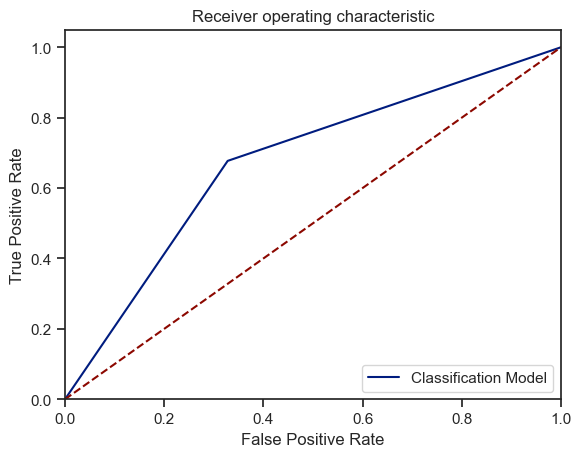

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[4110 4056]
 [1472 6775]]
Outcome values : 
 4110 4056 1472 6775
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.50      0.60      8166
           0       0.63      0.82      0.71      8247

    accuracy                           0.66     16413
   macro avg       0.68      0.66      0.65     16413
weighted avg       0.68      0.66      0.65     16413

Accuracy : 66.3 %
Precision : 73.6 %
Recall : 50.3 %
F1 Score : 0.598
Specificity or True Negative Rate : 82.2 %
Balanced Accuracy : 66.2 %
MCC : 0.343
roc_auc_score: 0.662


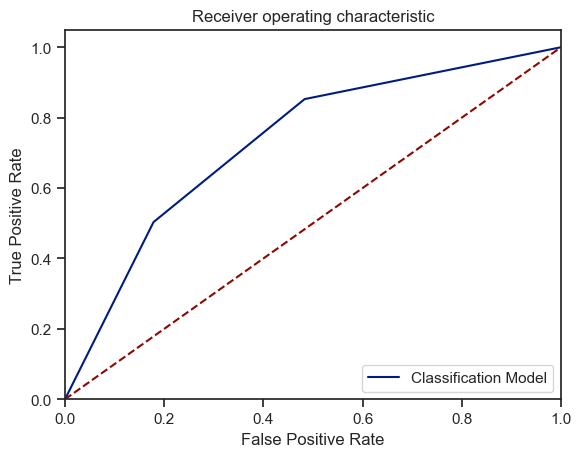

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[5935 2231]
 [2545 5702]]
Outcome values : 
 5935 2231 2545 5702
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.73      0.71      8166
           0       0.72      0.69      0.70      8247

    accuracy                           0.71     16413
   macro avg       0.71      0.71      0.71     16413
weighted avg       0.71      0.71      0.71     16413

Accuracy : 70.9 %
Precision : 70.0 %
Recall : 72.7 %
F1 Score : 0.713
Specificity or True Negative Rate : 69.1 %
Balanced Accuracy : 70.9 %
MCC : 0.418
roc_auc_score: 0.709


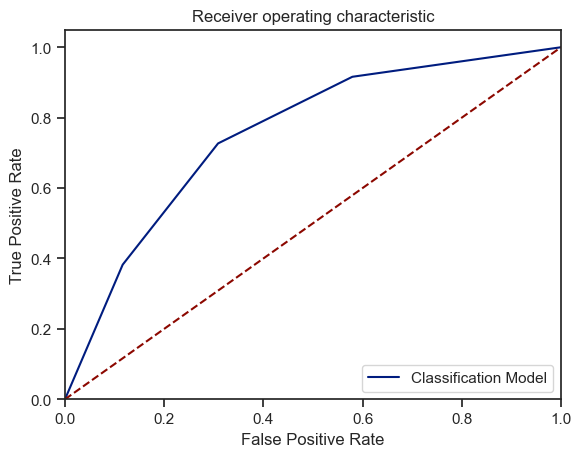

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[5050 3116]
 [1828 6419]]
Outcome values : 
 5050 3116 1828 6419
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.62      0.67      8166
           0       0.67      0.78      0.72      8247

    accuracy                           0.70     16413
   macro avg       0.70      0.70      0.70     16413
weighted avg       0.70      0.70      0.70     16413

Accuracy : 69.9 %
Precision : 73.4 %
Recall : 61.8 %
F1 Score : 0.671
Specificity or True Negative Rate : 77.8 %
Balanced Accuracy : 69.8 %
MCC : 0.402
roc_auc_score: 0.698


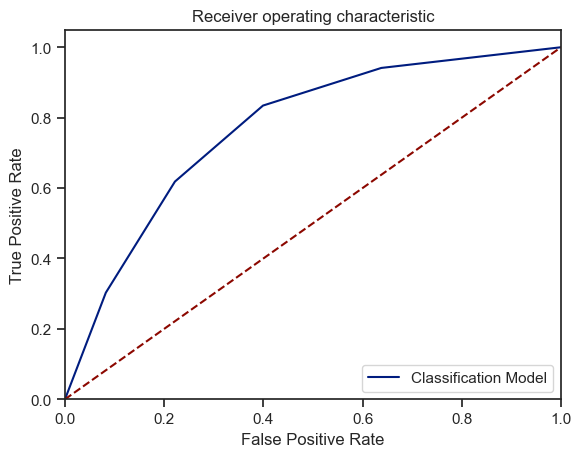

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[6143 2023]
 [2533 5714]]
Outcome values : 
 6143 2023 2533 5714
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.75      0.73      8166
           0       0.74      0.69      0.71      8247

    accuracy                           0.72     16413
   macro avg       0.72      0.72      0.72     16413
weighted avg       0.72      0.72      0.72     16413

Accuracy : 72.2 %
Precision : 70.8 %
Recall : 75.2 %
F1 Score : 0.729
Specificity or True Negative Rate : 69.3 %
Balanced Accuracy : 72.2 %
MCC : 0.446
roc_auc_score: 0.723


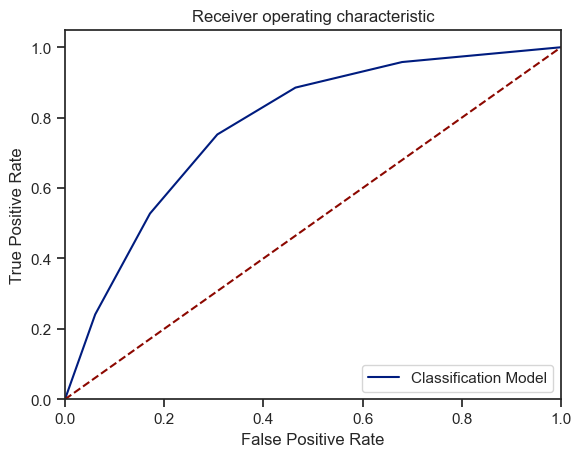

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[5524 2642]
 [1997 6250]]
Outcome values : 
 5524 2642 1997 6250
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.68      0.70      8166
           0       0.70      0.76      0.73      8247

    accuracy                           0.72     16413
   macro avg       0.72      0.72      0.72     16413
weighted avg       0.72      0.72      0.72     16413

Accuracy : 71.7 %
Precision : 73.4 %
Recall : 67.6 %
F1 Score : 0.704
Specificity or True Negative Rate : 75.8 %
Balanced Accuracy : 71.7 %
MCC : 0.436
roc_auc_score: 0.717


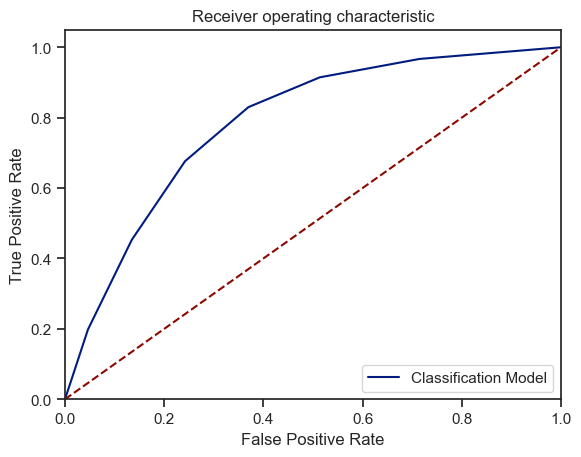

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[6300 1866]
 [2536 5711]]
Outcome values : 
 6300 1866 2536 5711
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.77      0.74      8166
           0       0.75      0.69      0.72      8247

    accuracy                           0.73     16413
   macro avg       0.73      0.73      0.73     16413
weighted avg       0.73      0.73      0.73     16413

Accuracy : 73.2 %
Precision : 71.3 %
Recall : 77.1 %
F1 Score : 0.741
Specificity or True Negative Rate : 69.2 %
Balanced Accuracy : 73.2 %
MCC : 0.465
roc_auc_score: 0.732


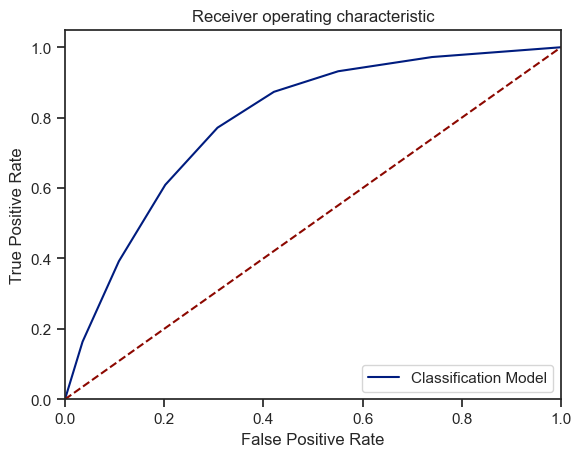

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[5842 2324]
 [2137 6110]]
Outcome values : 
 5842 2324 2137 6110
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.72      0.72      8166
           0       0.72      0.74      0.73      8247

    accuracy                           0.73     16413
   macro avg       0.73      0.73      0.73     16413
weighted avg       0.73      0.73      0.73     16413

Accuracy : 72.8 %
Precision : 73.2 %
Recall : 71.5 %
F1 Score : 0.724
Specificity or True Negative Rate : 74.1 %
Balanced Accuracy : 72.8 %
MCC : 0.456
roc_auc_score: 0.728


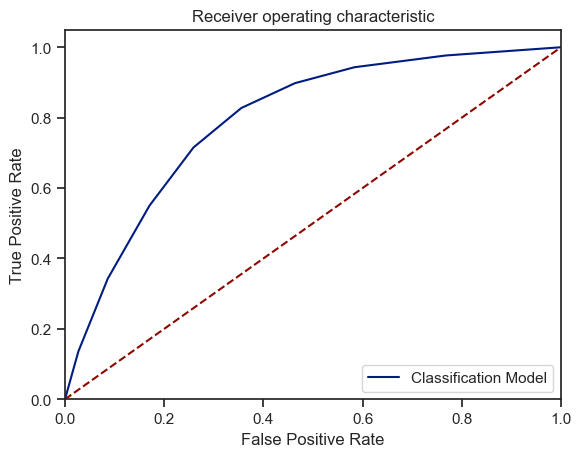

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[6356 1810]
 [2529 5718]]
Outcome values : 
 6356 1810 2529 5718
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.78      0.75      8166
           0       0.76      0.69      0.72      8247

    accuracy                           0.74     16413
   macro avg       0.74      0.74      0.74     16413
weighted avg       0.74      0.74      0.74     16413

Accuracy : 73.6 %
Precision : 71.5 %
Recall : 77.8 %
F1 Score : 0.746
Specificity or True Negative Rate : 69.3 %
Balanced Accuracy : 73.6 %
MCC : 0.473
roc_auc_score: 0.736


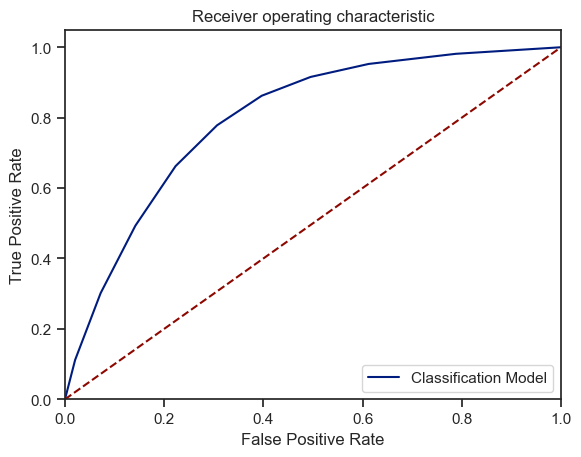

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[5986 2180]
 [2208 6039]]
Outcome values : 
 5986 2180 2208 6039
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.73      0.73      8166
           0       0.73      0.73      0.73      8247

    accuracy                           0.73     16413
   macro avg       0.73      0.73      0.73     16413
weighted avg       0.73      0.73      0.73     16413

Accuracy : 73.3 %
Precision : 73.1 %
Recall : 73.3 %
F1 Score : 0.732
Specificity or True Negative Rate : 73.2 %
Balanced Accuracy : 73.2 %
MCC : 0.465
roc_auc_score: 0.733


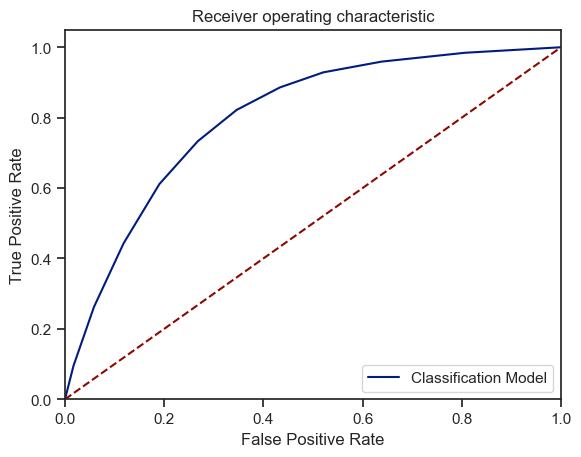

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[6406 1760]
 [2523 5724]]
Outcome values : 
 6406 1760 2523 5724
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.78      0.75      8166
           0       0.76      0.69      0.73      8247

    accuracy                           0.74     16413
   macro avg       0.74      0.74      0.74     16413
weighted avg       0.74      0.74      0.74     16413

Accuracy : 73.9 %
Precision : 71.7 %
Recall : 78.4 %
F1 Score : 0.749
Specificity or True Negative Rate : 69.4 %
Balanced Accuracy : 73.9 %
MCC : 0.48
roc_auc_score: 0.739


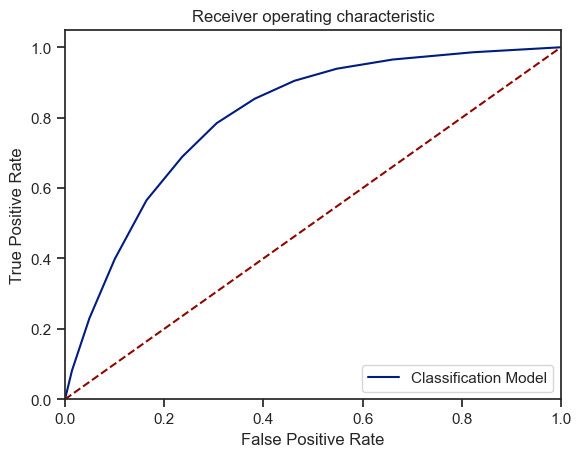

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[6099 2067]
 [2252 5995]]
Outcome values : 
 6099 2067 2252 5995
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.75      0.74      8166
           0       0.74      0.73      0.74      8247

    accuracy                           0.74     16413
   macro avg       0.74      0.74      0.74     16413
weighted avg       0.74      0.74      0.74     16413

Accuracy : 73.7 %
Precision : 73.0 %
Recall : 74.7 %
F1 Score : 0.739
Specificity or True Negative Rate : 72.7 %
Balanced Accuracy : 73.7 %
MCC : 0.474
roc_auc_score: 0.737


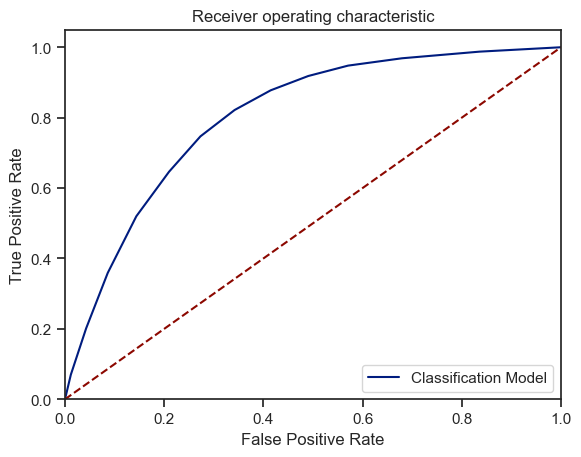

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[6437 1729]
 [2534 5713]]
Outcome values : 
 6437 1729 2534 5713
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.79      0.75      8166
           0       0.77      0.69      0.73      8247

    accuracy                           0.74     16413
   macro avg       0.74      0.74      0.74     16413
weighted avg       0.74      0.74      0.74     16413

Accuracy : 74.0 %
Precision : 71.8 %
Recall : 78.8 %
F1 Score : 0.751
Specificity or True Negative Rate : 69.3 %
Balanced Accuracy : 74.0 %
MCC : 0.483
roc_auc_score: 0.741


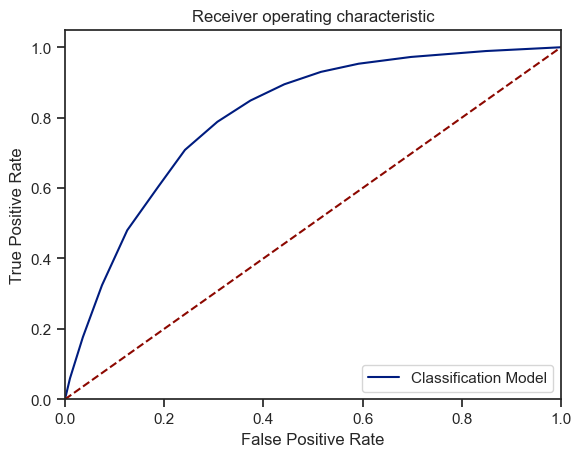

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[6145 2021]
 [2289 5958]]
Outcome values : 
 6145 2021 2289 5958
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.75      0.74      8166
           0       0.75      0.72      0.73      8247

    accuracy                           0.74     16413
   macro avg       0.74      0.74      0.74     16413
weighted avg       0.74      0.74      0.74     16413

Accuracy : 73.7 %
Precision : 72.9 %
Recall : 75.3 %
F1 Score : 0.74
Specificity or True Negative Rate : 72.2 %
Balanced Accuracy : 73.8 %
MCC : 0.475
roc_auc_score: 0.737


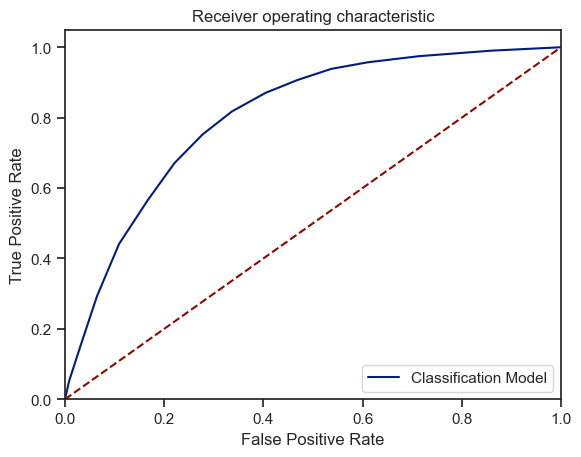

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[6415 1751]
 [2522 5725]]
Outcome values : 
 6415 1751 2522 5725
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.79      0.75      8166
           0       0.77      0.69      0.73      8247

    accuracy                           0.74     16413
   macro avg       0.74      0.74      0.74     16413
weighted avg       0.74      0.74      0.74     16413

Accuracy : 74.0 %
Precision : 71.8 %
Recall : 78.6 %
F1 Score : 0.75
Specificity or True Negative Rate : 69.4 %
Balanced Accuracy : 74.0 %
MCC : 0.482
roc_auc_score: 0.74


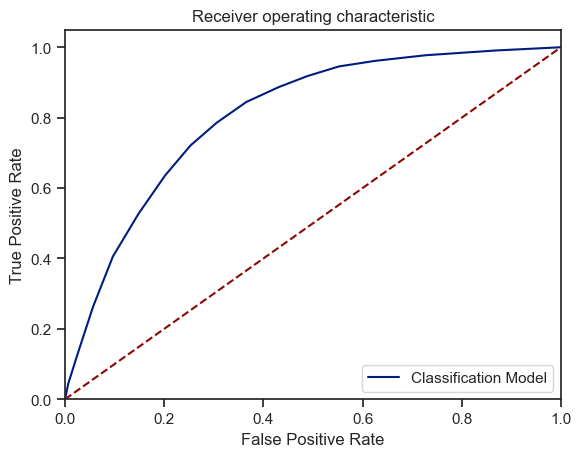

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[6181 1985]
 [2329 5918]]
Outcome values : 
 6181 1985 2329 5918
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.76      0.74      8166
           0       0.75      0.72      0.73      8247

    accuracy                           0.74     16413
   macro avg       0.74      0.74      0.74     16413
weighted avg       0.74      0.74      0.74     16413

Accuracy : 73.7 %
Precision : 72.6 %
Recall : 75.7 %
F1 Score : 0.741
Specificity or True Negative Rate : 71.8 %
Balanced Accuracy : 73.8 %
MCC : 0.475
roc_auc_score: 0.737


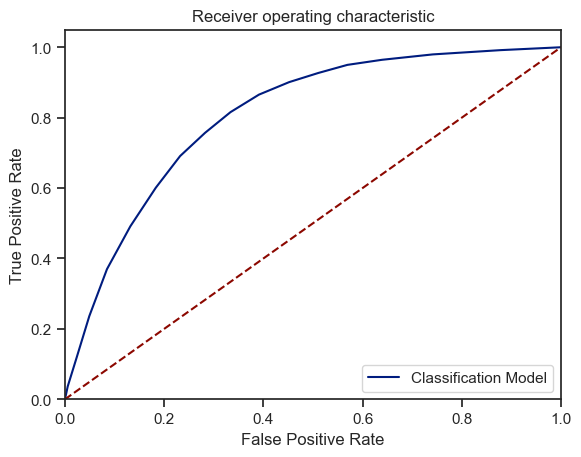

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[6424 1742]
 [2527 5720]]
Outcome values : 
 6424 1742 2527 5720
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.79      0.75      8166
           0       0.77      0.69      0.73      8247

    accuracy                           0.74     16413
   macro avg       0.74      0.74      0.74     16413
weighted avg       0.74      0.74      0.74     16413

Accuracy : 74.0 %
Precision : 71.8 %
Recall : 78.7 %
F1 Score : 0.751
Specificity or True Negative Rate : 69.4 %
Balanced Accuracy : 74.0 %
MCC : 0.482
roc_auc_score: 0.74


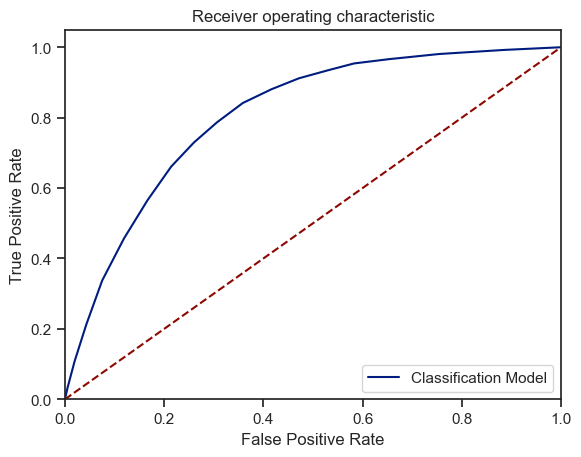

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[6216 1950]
 [2331 5916]]
Outcome values : 
 6216 1950 2331 5916
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.76      0.74      8166
           0       0.75      0.72      0.73      8247

    accuracy                           0.74     16413
   macro avg       0.74      0.74      0.74     16413
weighted avg       0.74      0.74      0.74     16413

Accuracy : 73.9 %
Precision : 72.7 %
Recall : 76.1 %
F1 Score : 0.744
Specificity or True Negative Rate : 71.7 %
Balanced Accuracy : 73.9 %
MCC : 0.479
roc_auc_score: 0.739


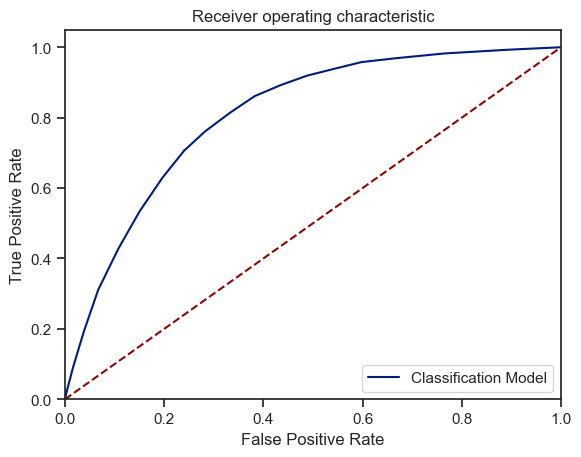

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[6447 1719]
 [2534 5713]]
Outcome values : 
 6447 1719 2534 5713
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.79      0.75      8166
           0       0.77      0.69      0.73      8247

    accuracy                           0.74     16413
   macro avg       0.74      0.74      0.74     16413
weighted avg       0.74      0.74      0.74     16413

Accuracy : 74.1 %
Precision : 71.8 %
Recall : 78.9 %
F1 Score : 0.752
Specificity or True Negative Rate : 69.3 %
Balanced Accuracy : 74.1 %
MCC : 0.484
roc_auc_score: 0.741


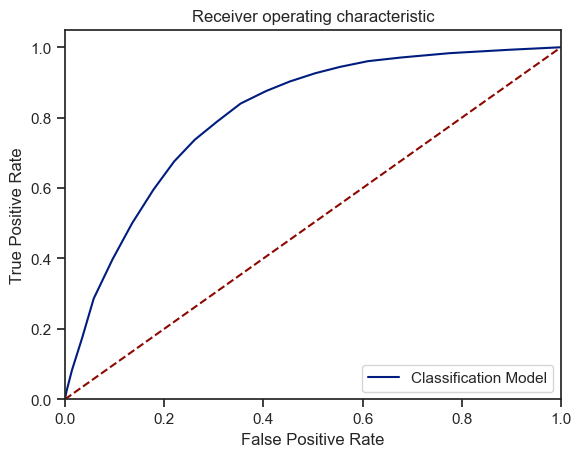

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[6254 1912]
 [2353 5894]]
Outcome values : 
 6254 1912 2353 5894
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.77      0.75      8166
           0       0.76      0.71      0.73      8247

    accuracy                           0.74     16413
   macro avg       0.74      0.74      0.74     16413
weighted avg       0.74      0.74      0.74     16413

Accuracy : 74.0 %
Precision : 72.7 %
Recall : 76.6 %
F1 Score : 0.746
Specificity or True Negative Rate : 71.5 %
Balanced Accuracy : 74.0 %
MCC : 0.481
roc_auc_score: 0.74


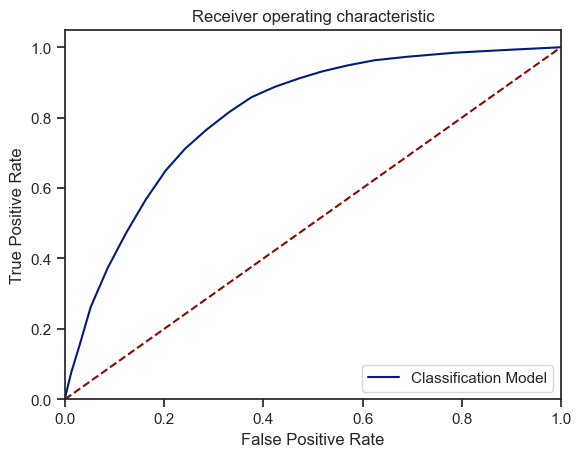

In [27]:
# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results---------------------------------------------------

In [28]:
 KNN_Results

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,5530,2636,2705,5542,0.675,0.672,0.677,0.674,0.672,0.349,0.674600,0.675
1,KNeighborsClassifier(n_neighbors=2),2,4110,4056,1472,6775,0.663,0.736,0.503,0.598,0.822,0.343,0.662409,0.662
2,KNeighborsClassifier(n_neighbors=3),3,5935,2231,2545,5702,0.709,0.700,0.727,0.713,0.691,0.418,0.709098,0.709
3,KNeighborsClassifier(n_neighbors=4),4,5050,3116,1828,6419,0.699,0.734,0.618,0.671,0.778,0.402,0.698381,0.698
4,KNeighborsClassifier(),5,6143,2023,2533,5714,0.722,0.708,0.752,0.729,0.693,0.446,0.722562,0.722
5,KNeighborsClassifier(n_neighbors=6),6,5524,2642,1997,6250,0.717,0.734,0.676,0.704,0.758,0.436,0.717157,0.717
6,KNeighborsClassifier(n_neighbors=7),7,6300,1866,2536,5711,0.732,0.713,0.771,0.741,0.692,0.465,0.731993,0.732
7,KNeighborsClassifier(n_neighbors=8),8,5842,2324,2137,6110,0.728,0.732,0.715,0.724,0.741,0.456,0.728140,0.728
8,KNeighborsClassifier(n_neighbors=9),9,6356,1810,2529,5718,0.736,0.715,0.778,0.746,0.693,0.473,0.735846,0.736
9,KNeighborsClassifier(n_neighbors=10),10,5986,2180,2208,6039,0.733,0.731,0.733,0.732,0.732,0.465,0.732653,0.732


# SVM

In [29]:
# Load the bcdata dataset
EM_Results=pd.read_csv(r"C:\Users\Rakesh\Downloads\EMResults.csv", header=0) 
EM_Results.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# SVM Linear

Model Name:  SVM - Linear
Confusion matrix : 
 [[6440 1726]
 [2461 5786]]
Outcome values : 
 6440 1726 2461 5786
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.79      0.75      8166
           0       0.77      0.70      0.73      8247

    accuracy                           0.74     16413
   macro avg       0.75      0.75      0.74     16413
weighted avg       0.75      0.74      0.74     16413

Accuracy : 74.5 %
Precision : 72.4 %
Recall : 78.9 %
F1 Score : 0.755
Specificity or True Negative Rate : 70.2 %
Balanced Accuracy : 74.6 %
MCC : 0.492
roc_auc_score: 0.745


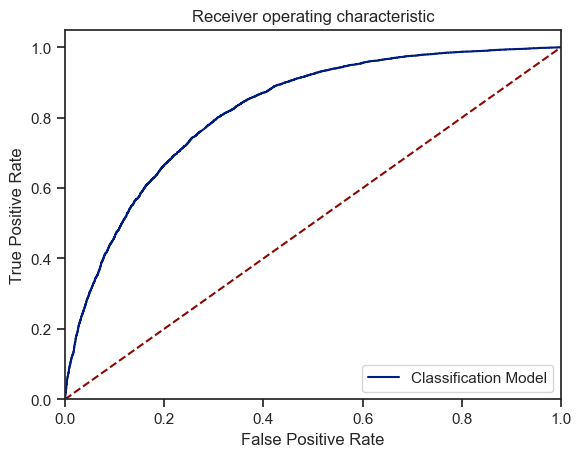

-----------------------------------------------------------------------------------------------------


In [30]:
# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data 

ModelSVM1 = ModelSVM1.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults = EM_Results.append(new_row, ignore_index=True)
#-------------------------------------------------------------------------------------------------------------

# SVM POLY KERNAL

Model Name:  SVM - Polynominal
Confusion matrix : 
 [[6597 1569]
 [2458 5789]]
Outcome values : 
 6597 1569 2458 5789
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.81      0.77      8166
           0       0.79      0.70      0.74      8247

    accuracy                           0.75     16413
   macro avg       0.76      0.75      0.75     16413
weighted avg       0.76      0.75      0.75     16413

Accuracy : 75.5 %
Precision : 72.9 %
Recall : 80.8 %
F1 Score : 0.766
Specificity or True Negative Rate : 70.2 %
Balanced Accuracy : 75.5 %
MCC : 0.513
roc_auc_score: 0.755


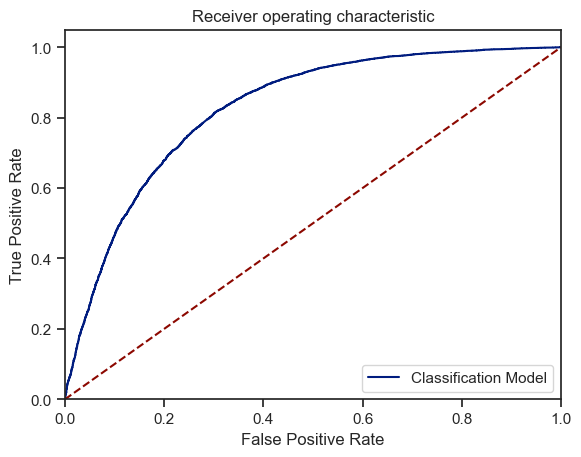

-----------------------------------------------------------------------------------------------------


In [31]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

ModelSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMPoly.predict(x_test)
y_pred_prob = ModelSVMPoly.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Polynominal",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults = EMResults.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------

# SVM - Gaussian

Model Name:  SVM - Gaussian
Confusion matrix : 
 [[6583 1583]
 [2451 5796]]
Outcome values : 
 6583 1583 2451 5796
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.81      0.77      8166
           0       0.79      0.70      0.74      8247

    accuracy                           0.75     16413
   macro avg       0.76      0.75      0.75     16413
weighted avg       0.76      0.75      0.75     16413

Accuracy : 75.4 %
Precision : 72.9 %
Recall : 80.6 %
F1 Score : 0.765
Specificity or True Negative Rate : 70.3 %
Balanced Accuracy : 75.4 %
MCC : 0.512
roc_auc_score: 0.754


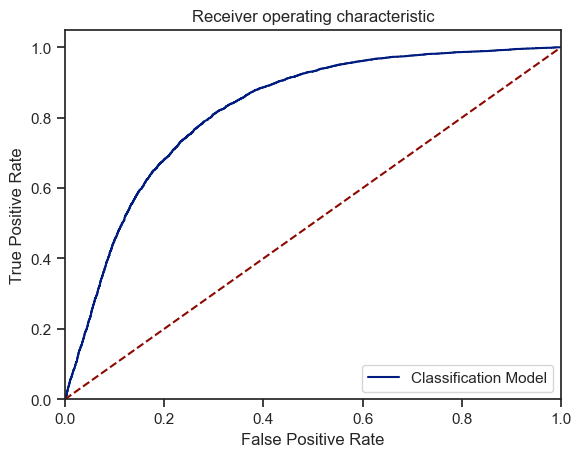

-----------------------------------------------------------------------------------------------------


In [32]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMGaussian.predict(x_test)
y_pred_prob = ModelSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name
    
print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults = EMResults.append(new_row, ignore_index=True)
#---------------------------------------------------------------------------------------------------------------

# SVM - Sigmoid

Model Name:  SVM - Sigmoid
Confusion matrix : 
 [[4194 3972]
 [4014 4233]]
Outcome values : 
 4194 3972 4014 4233
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.51      0.51      8166
           0       0.52      0.51      0.51      8247

    accuracy                           0.51     16413
   macro avg       0.51      0.51      0.51     16413
weighted avg       0.51      0.51      0.51     16413

Accuracy : 51.3 %
Precision : 51.1 %
Recall : 51.4 %
F1 Score : 0.512
Specificity or True Negative Rate : 51.3 %
Balanced Accuracy : 51.4 %
MCC : 0.027
roc_auc_score: 0.513


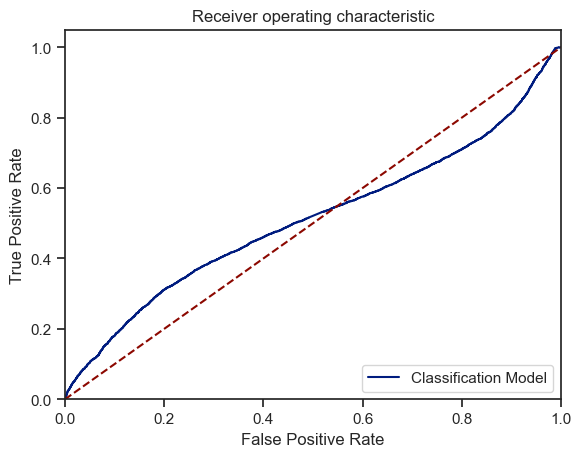

-----------------------------------------------------------------------------------------------------


In [33]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMSig.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMSig.predict(x_test)
y_pred_prob = ModelSVMSig.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Sigmoid")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMSig.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Sigmoid",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults = EMResults.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

In [34]:
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,6440,1726,2461,5786,0.745,0.724,0.789,0.755,0.702,0.492,0.745112,0.746
1,SVM - Polynominal,6597,1569,2458,5789,0.755,0.729,0.808,0.766,0.702,0.513,0.754907,0.755
2,SVM - Gaussian,6583,1583,2451,5796,0.754,0.729,0.806,0.765,0.703,0.512,0.754474,0.754
3,SVM - Sigmoid,4194,3972,4014,4233,0.513,0.511,0.514,0.512,0.513,0.027,0.513435,0.514


# Compare The Classification Models

In [35]:
EMResults1 = pd.read_csv(r"C:\Users\Rakesh\Downloads\EMResults (1).csv",header=0)
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[6245 1921]
 [2288 5959]]
Outcome values : 
 6245 1921 2288 5959
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.76      0.75      8166
           0       0.76      0.72      0.74      8247

    accuracy                           0.74     16413
   macro avg       0.74      0.74      0.74     16413
weighted avg       0.74      0.74      0.74     16413

Accuracy : 74.4 %
Precision : 73.2 %
Recall : 76.5 %
F1 Score : 0.748
Specificity or True Negative Rate : 72.3 %
Balanced Accuracy : 74.4 %
MCC : 0.488
roc_auc_score: 0.744


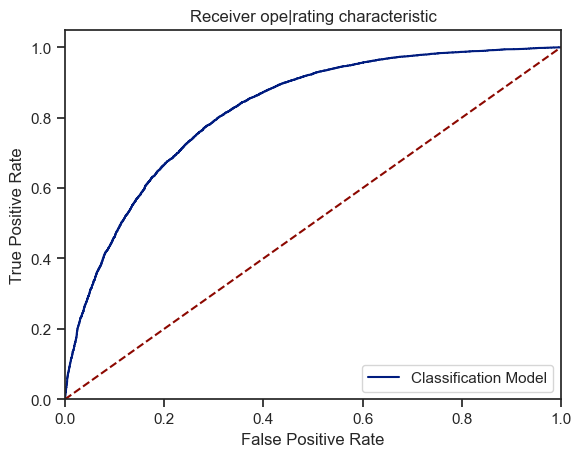

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[5438 2728]
 [2707 5540]]
Outcome values : 
 5438 2728 2707 5540
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.67      0.67      8166
           0       0.67      0.67      0.67      8247

    accuracy                           0.67     16413
   macro avg       0.67      0.67      0.67     16413
weighted avg       0.67      0.67      0.67     16413

Accuracy : 66.9 %
Precision : 66.8 %
Recall : 66.6 %
F1 Score : 0.667
Specificity or True Negative Rate : 67.2 %
Balanced Accuracy : 66.9 %
MCC : 0.338
roc_auc_score: 0.669


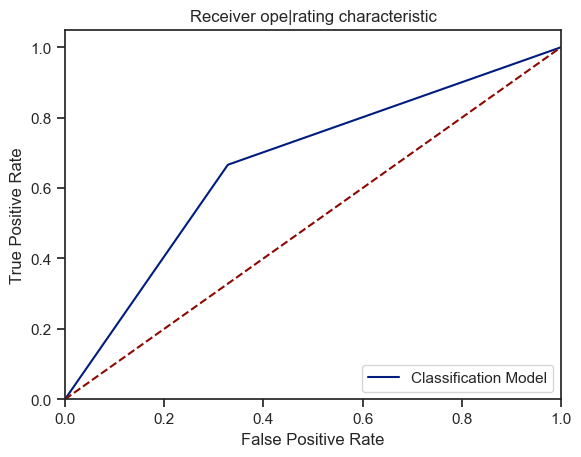

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[6299 1867]
 [2428 5819]]
Outcome values : 
 6299 1867 2428 5819
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.77      0.75      8166
           0       0.76      0.71      0.73      8247

    accuracy                           0.74     16413
   macro avg       0.74      0.74      0.74     16413
weighted avg       0.74      0.74      0.74     16413

Accuracy : 73.8 %
Precision : 72.2 %
Recall : 77.1 %
F1 Score : 0.746
Specificity or True Negative Rate : 70.6 %
Balanced Accuracy : 73.8 %
MCC : 0.478
roc_auc_score: 0.738


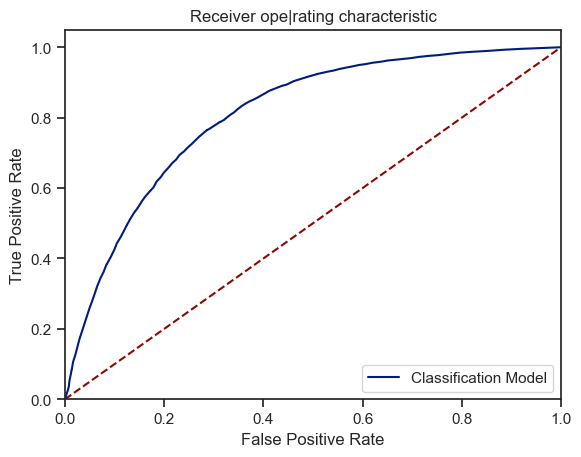

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[6146 2020]
 [2470 5777]]
Outcome values : 
 6146 2020 2470 5777
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.75      0.73      8166
           0       0.74      0.70      0.72      8247

    accuracy                           0.73     16413
   macro avg       0.73      0.73      0.73     16413
weighted avg       0.73      0.73      0.73     16413

Accuracy : 72.6 %
Precision : 71.3 %
Recall : 75.3 %
F1 Score : 0.732
Specificity or True Negative Rate : 70.0 %
Balanced Accuracy : 72.6 %
MCC : 0.454
roc_auc_score: 0.727


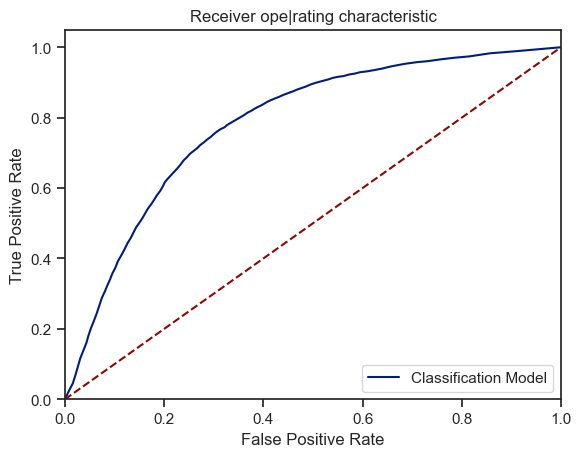

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[6254 1912]
 [2353 5894]]
Outcome values : 
 6254 1912 2353 5894
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.77      0.75      8166
           0       0.76      0.71      0.73      8247

    accuracy                           0.74     16413
   macro avg       0.74      0.74      0.74     16413
weighted avg       0.74      0.74      0.74     16413

Accuracy : 74.0 %
Precision : 72.7 %
Recall : 76.6 %
F1 Score : 0.746
Specificity or True Negative Rate : 71.5 %
Balanced Accuracy : 74.0 %
MCC : 0.481
roc_auc_score: 0.74


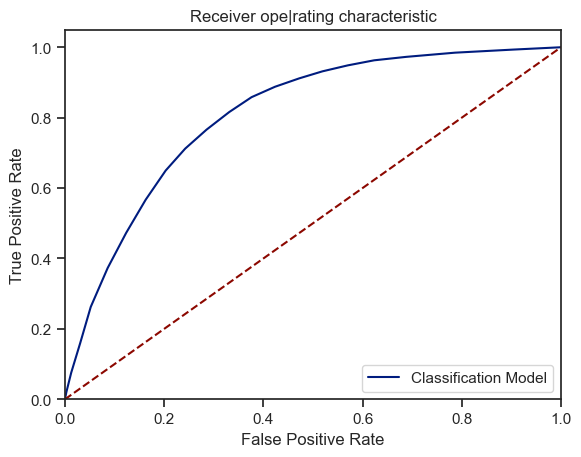

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(degree=2, kernel='poly', probability=True)
Confusion matrix : 
 [[6597 1569]
 [2458 5789]]
Outcome values : 
 6597 1569 2458 5789
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.81      0.77      8166
           0       0.79      0.70      0.74      8247

    accuracy                           0.75     16413
   macro avg       0.76      0.75      0.75     16413
weighted avg       0.76      0.75      0.75     16413

Accuracy : 75.5 %
Precision : 72.9 %
Recall : 80.8 %
F1 Score : 0.766
Specificity or True Negative Rate : 70.2 %
Balanced Accuracy : 75.5 %
MCC : 0.513
roc_auc_score: 0.755


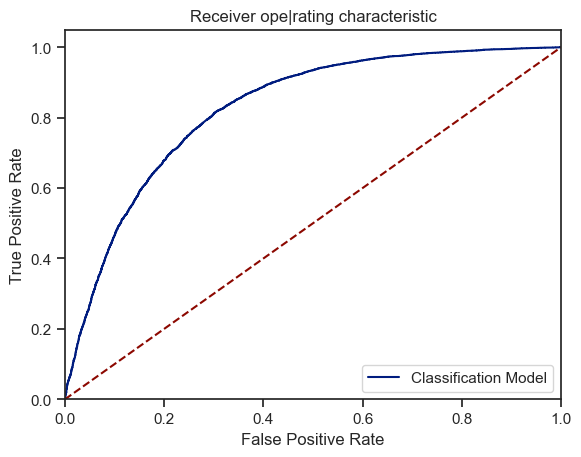

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[4839 3327]
 [1684 6563]]
Outcome values : 
 4839 3327 1684 6563
Classification report : 
               precision    recall  f1-score   support

           1       0.74      0.59      0.66      8166
           0       0.66      0.80      0.72      8247

    accuracy                           0.69     16413
   macro avg       0.70      0.69      0.69     16413
weighted avg       0.70      0.69      0.69     16413

Accuracy : 69.5 %
Precision : 74.2 %
Recall : 59.3 %
F1 Score : 0.659
Specificity or True Negative Rate : 79.6 %
Balanced Accuracy : 69.4 %
MCC : 0.397
roc_auc_score: 0.694


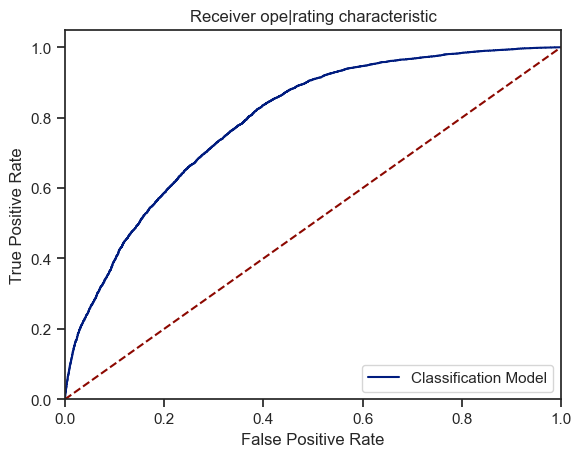

-----------------------------------------------------------------------------------------------------


In [41]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=20)
ModelSVM = SVC(kernel='poly', degree=2, probability=True)
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver ope|rating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults1 = EMResults1.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [42]:
EMResults1.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),6245,1921,2288,5959,0.744,0.732,0.765,0.748,0.723,0.488,0.743661,0.744
1,DecisionTreeClassifier(),5429,2737,2705,5542,0.668,0.667,0.665,0.666,0.672,0.337,0.668416,0.669
2,"(DecisionTreeClassifier(max_features='sqrt', r...",6307,1859,2422,5825,0.739,0.723,0.772,0.747,0.706,0.480,0.739333,0.739
3,"(ExtraTreeClassifier(random_state=1867464240),...",6127,2039,2473,5774,0.725,0.712,0.750,0.731,0.700,0.451,0.725220,0.725
4,KNeighborsClassifier(),6143,2023,2533,5714,0.722,0.708,0.752,0.729,0.693,0.446,0.722562,0.722
5,"SVC(class_weight='balanced', probability=True,...",6583,1583,2451,5796,0.754,0.729,0.806,0.765,0.703,0.512,0.754474,0.754
6,GaussianNB(),4839,3327,1684,6563,0.695,0.742,0.593,0.659,0.796,0.397,0.694192,0.694
7,LogisticRegression(),6245,1921,2288,5959,0.744,0.732,0.765,0.748,0.723,0.488,0.743661,0.744
8,DecisionTreeClassifier(),5438,2728,2707,5540,0.669,0.668,0.666,0.667,0.672,0.338,0.668846,0.669
9,"(DecisionTreeClassifier(max_features='sqrt', r...",6299,1867,2428,5819,0.738,0.722,0.771,0.746,0.706,0.478,0.738480,0.738


In [43]:
data_bk=Data.copy()

In [63]:
y_predRF=ModelSVM.predict(x_test)

In [69]:
Results = pd.DataFrame({'HeartDisease_P':y_predRF})
ResultsFinal=data_bk.merge(Results,left_index=True,right_index=True)
ResultsFinal.sample(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_P
5054,1,1445,1,0,0,5,30,1,1,11,5,2,0,1,7,1,0,1,0
7928,1,1611,1,0,0,0,0,0,1,9,5,0,0,2,5,0,0,0,0
15492,0,1108,0,0,0,0,0,0,1,9,5,2,1,2,2,0,0,0,1
13960,1,759,1,0,0,0,0,0,0,11,5,0,1,2,7,0,0,1,0
11574,0,63,1,0,0,30,30,1,0,7,5,0,0,3,5,0,0,0,0
4725,1,2092,0,0,0,0,0,1,0,12,5,0,0,4,6,0,0,1,1
14778,1,1092,1,0,0,0,0,0,1,10,5,0,1,2,7,0,0,0,1
8034,1,1167,1,0,0,0,0,1,1,12,5,2,1,2,7,1,0,1,0
6269,0,951,0,0,0,0,0,0,0,4,5,0,1,0,5,0,0,0,1
9697,1,1669,1,0,1,25,14,0,0,8,5,2,1,1,5,1,0,1,1
